In [20]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from tqdm import tqdm, trange

import warnings
warnings.filterwarnings("ignore")

In [21]:
df= pd.read_csv("/kaggle/input/appliances-energy-prediction/KAG_energydata_complete.csv",
                 parse_dates= ["date"], date_format= "%Y-%m-%d %H:%M:%S")#.reset_index()

In [22]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097

In [23]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [24]:
df.describe()

date    Appliances        lights            T1  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     97.694958      3.801875     21.686571   
min    2016-01-11 17:00:00     10.000000      0.000000     16.790000   
25%    2016-02-14 23:15:00     50.000000      0.000000     20.760000   
50%    2016-03-20 05:30:00     60.000000      0.000000     21.600000   
75%    2016-04-23 11:45:00    100.000000      0.000000     22.600000   
max    2016-05-27 18:00:00   1080.000000     70.000000     26.260000   
std                    NaN    102.524891      7.935988      1.606066   

               RH_1            T2          RH_2            T3          RH_3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     20.341219     40.420420     22.267611     39.242500   
min       27.023333     16.100000     20.463333     17.200000     28.766667   
25%       37.333333     18.790000     37.900000     20.790000     36.900000   
50%       39.656667     20.000000     40.500000     22.100000     38.530000   
75%       43.066667     21.500000     43.260000     23.290000     41.760000   
max       63.360000     29.856667     56.026667     29.236000     50.163333   
std        3.979299      2.192974      4.069813      2.006111      3.254576   

                 T4          RH_4            T5          RH_5            T6  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      20.855335     39.026904     19.592106     50.949283      7.910939   
min       15.100000     27.660000     15.330000     29.815000     -6.065000   
25%       19.530000     35.530000     18.277500     45.400000      3.626667   
50%       20.666667     38.400000     19.390000     49.090000      7.300000   
75%       22.100000     42.156667     20.619643     53.663333     11.256000   
max       26.200000     51.090000     25.795000     96.321667     28.290000   
std        2.042884      4.341321      1.844623      9.022034      6.090347   

               RH_6            T7          RH_7            T8          RH_8  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      54.609083     20.267106     35.388200     22.029107     42.936165   
min        1.000000     15.390000     23.200000     16.306667     29.600000   
25%       30.025000     18.700000     31.500000     20.790000     39.066667   
50%       55.290000     20.033333     34.863333     22.100000     42.375000   
75%       83.226667     21.600000     39.000000     23.390000     46.536000   
max       99.900000     26.000000     51.400000     27.230000     58.780000   
std       31.149806      2.109993      5.114208      1.956162      5.224361   

                 T9          RH_9         T_out   Press_mm_hg        RH_out  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      19.485828     41.552401      7.411665    755.522602     79.750418   
min       14.890000     29.166667     -5.000000    729.300000     24.000000   
25%       18.000000     38.500000      3.666667    750.933333     70.333333   
50%       19.390000     40.900000      6.916667    756.100000     83.666667   
75%       20.600000     44.338095     10.408333    760.933333     91.666667   
max       24.500000     53.326667     26.100000    772.300000    100.000000   
std        2.014712      4.151497      5.317409      7.399441     14.901088   

          Windspeed    Visibility     Tdewpoint           rv1           rv2  
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  
mean       4.039752     38.330834      3.760707     24.988033     24.988033  
min        0.000000      1.000000     -6.600000      0.005322      0.005322  
25%        2.000000     29.000000      0.900000     12.497889     12.497889  
50%        3.666667     40.000000      3.433333     24.897653     24.897653  
75%        5.500000     40.000000      6.566667     37.58

In [25]:
#restructuring the columns
df.columns= df.columns.str.lower()
df= df.reindex(columns= sorted(df.columns))
df.head()

appliances                date  lights  press_mm_hg       rh_1       rh_2  \
0          60 2016-01-11 17:00:00      30        733.5  47.596667  44.790000   
1          60 2016-01-11 17:10:00      30        733.6  46.693333  44.722500   
2          50 2016-01-11 17:20:00      30        733.7  46.300000  44.626667   
3          50 2016-01-11 17:30:00      40        733.8  46.066667  44.590000   
4          60 2016-01-11 17:40:00      40        733.9  46.333333  44.530000   

        rh_3       rh_4   rh_5       rh_6       rh_7       rh_8   rh_9  \
0  44.730000  45.566667  55.20  84.256667  41.626667  48.900000  45.53   
1  44.790000  45.992500  55.20  84.063333  41.560000  48.863333  45.56   
2  44.933333  45.890000  55.09  83.156667  41.433333  48.730000  45.50   
3  45.000000  45.723333  55.09  83.423333  41.290000  48.590000  45.40   
4  45.000000  45.530000  55.09  84.893333  41.230000  48.590000  45.40   

   rh_out        rv1        rv2     t1    t2     t3         t4         t5  \
0    92.0  13.275433  13.275433  19.89  19.2  19.79  19.000000  17.166667   
1    92.0  18.606195  18.606195  19.89  19.2  19.79  19.000000  17.166667   
2    92.0  28.642668  28.642668  19.89  19.2  19.79  18.926667  17.166667   
3    92.0  45.410389  45.410389  19.89  19.2  19.79  18.890000  17.166667   
4    92.0  10.084097  10.084097  19.89  19.2  19.79  18.890000  17.200000   

         t6         t7    t8         t9     t_out  tdewpoint  visibility  \
0  7.026667  17.200000  18.2  17.033333  6.600000        5.3   63.000000   
1  6.833333  17.200000  18.2  17.066667  6.483333        5.2   59.166667   
2  6.560000  17.200000  18.2  17.000000  6.366667        5.1   55.333333   
3  6.433333  17.133333  18.1  17.000000  6.250000        5.0   51.500000   
4  6.366667  17.200000  18.1  17.000000  6.133333        4.9   47.666667   

   windspeed  
0   7.000000  
1   6.666667  
2   6.333333  
3   6.000000  
4   5.666667

In [26]:
#creating a copy of the original data, that'll be used for model building
df_model= df.copy()
df_model.head()

appliances                date  lights  press_mm_hg       rh_1       rh_2  \
0          60 2016-01-11 17:00:00      30        733.5  47.596667  44.790000   
1          60 2016-01-11 17:10:00      30        733.6  46.693333  44.722500   
2          50 2016-01-11 17:20:00      30        733.7  46.300000  44.626667   
3          50 2016-01-11 17:30:00      40        733.8  46.066667  44.590000   
4          60 2016-01-11 17:40:00      40        733.9  46.333333  44.530000   

        rh_3       rh_4   rh_5       rh_6       rh_7       rh_8   rh_9  \
0  44.730000  45.566667  55.20  84.256667  41.626667  48.900000  45.53   
1  44.790000  45.992500  55.20  84.063333  41.560000  48.863333  45.56   
2  44.933333  45.890000  55.09  83.156667  41.433333  48.730000  45.50   
3  45.000000  45.723333  55.09  83.423333  41.290000  48.590000  45.40   
4  45.000000  45.530000  55.09  84.893333  41.230000  48.590000  45.40   

   rh_out        rv1        rv2     t1    t2     t3         t4         t5  \
0    92.0  13.275433  13.275433  19.89  19.2  19.79  19.000000  17.166667   
1    92.0  18.606195  18.606195  19.89  19.2  19.79  19.000000  17.166667   
2    92.0  28.642668  28.642668  19.89  19.2  19.79  18.926667  17.166667   
3    92.0  45.410389  45.410389  19.89  19.2  19.79  18.890000  17.166667   
4    92.0  10.084097  10.084097  19.89  19.2  19.79  18.890000  17.200000   

         t6         t7    t8         t9     t_out  tdewpoint  visibility  \
0  7.026667  17.200000  18.2  17.033333  6.600000        5.3   63.000000   
1  6.833333  17.200000  18.2  17.066667  6.483333        5.2   59.166667   
2  6.560000  17.200000  18.2  17.000000  6.366667        5.1   55.333333   
3  6.433333  17.133333  18.1  17.000000  6.250000        5.0   51.500000   
4  6.366667  17.200000  18.1  17.000000  6.133333        4.9   47.666667   

   windspeed  
0   7.000000  
1   6.666667  
2   6.333333  
3   6.000000  
4   5.666667

In [10]:
df.isnull().sum()

appliances     0
date           0
lights         0
press_mm_hg    0
rh_1           0
rh_2           0
rh_3           0
rh_4           0
rh_5           0
rh_6           0
rh_7           0
rh_8           0
rh_9           0
rh_out         0
rv1            0
rv2            0
t1             0
t2             0
t3             0
t4             0
t5             0
t6             0
t7             0
t8             0
t9             0
t_out          0
tdewpoint      0
visibility     0
windspeed      0
dtype: int64

There are no null values in the dataset

In [11]:
#adding is_weekend column

df.loc[:, "is_weekend"]= np.where(df.loc[:, "date"].dt.dayofweek>4, 1, 0)
df["is_weekend"].value_counts()

is_weekend
0    14263
1     5472
Name: count, dtype: int64

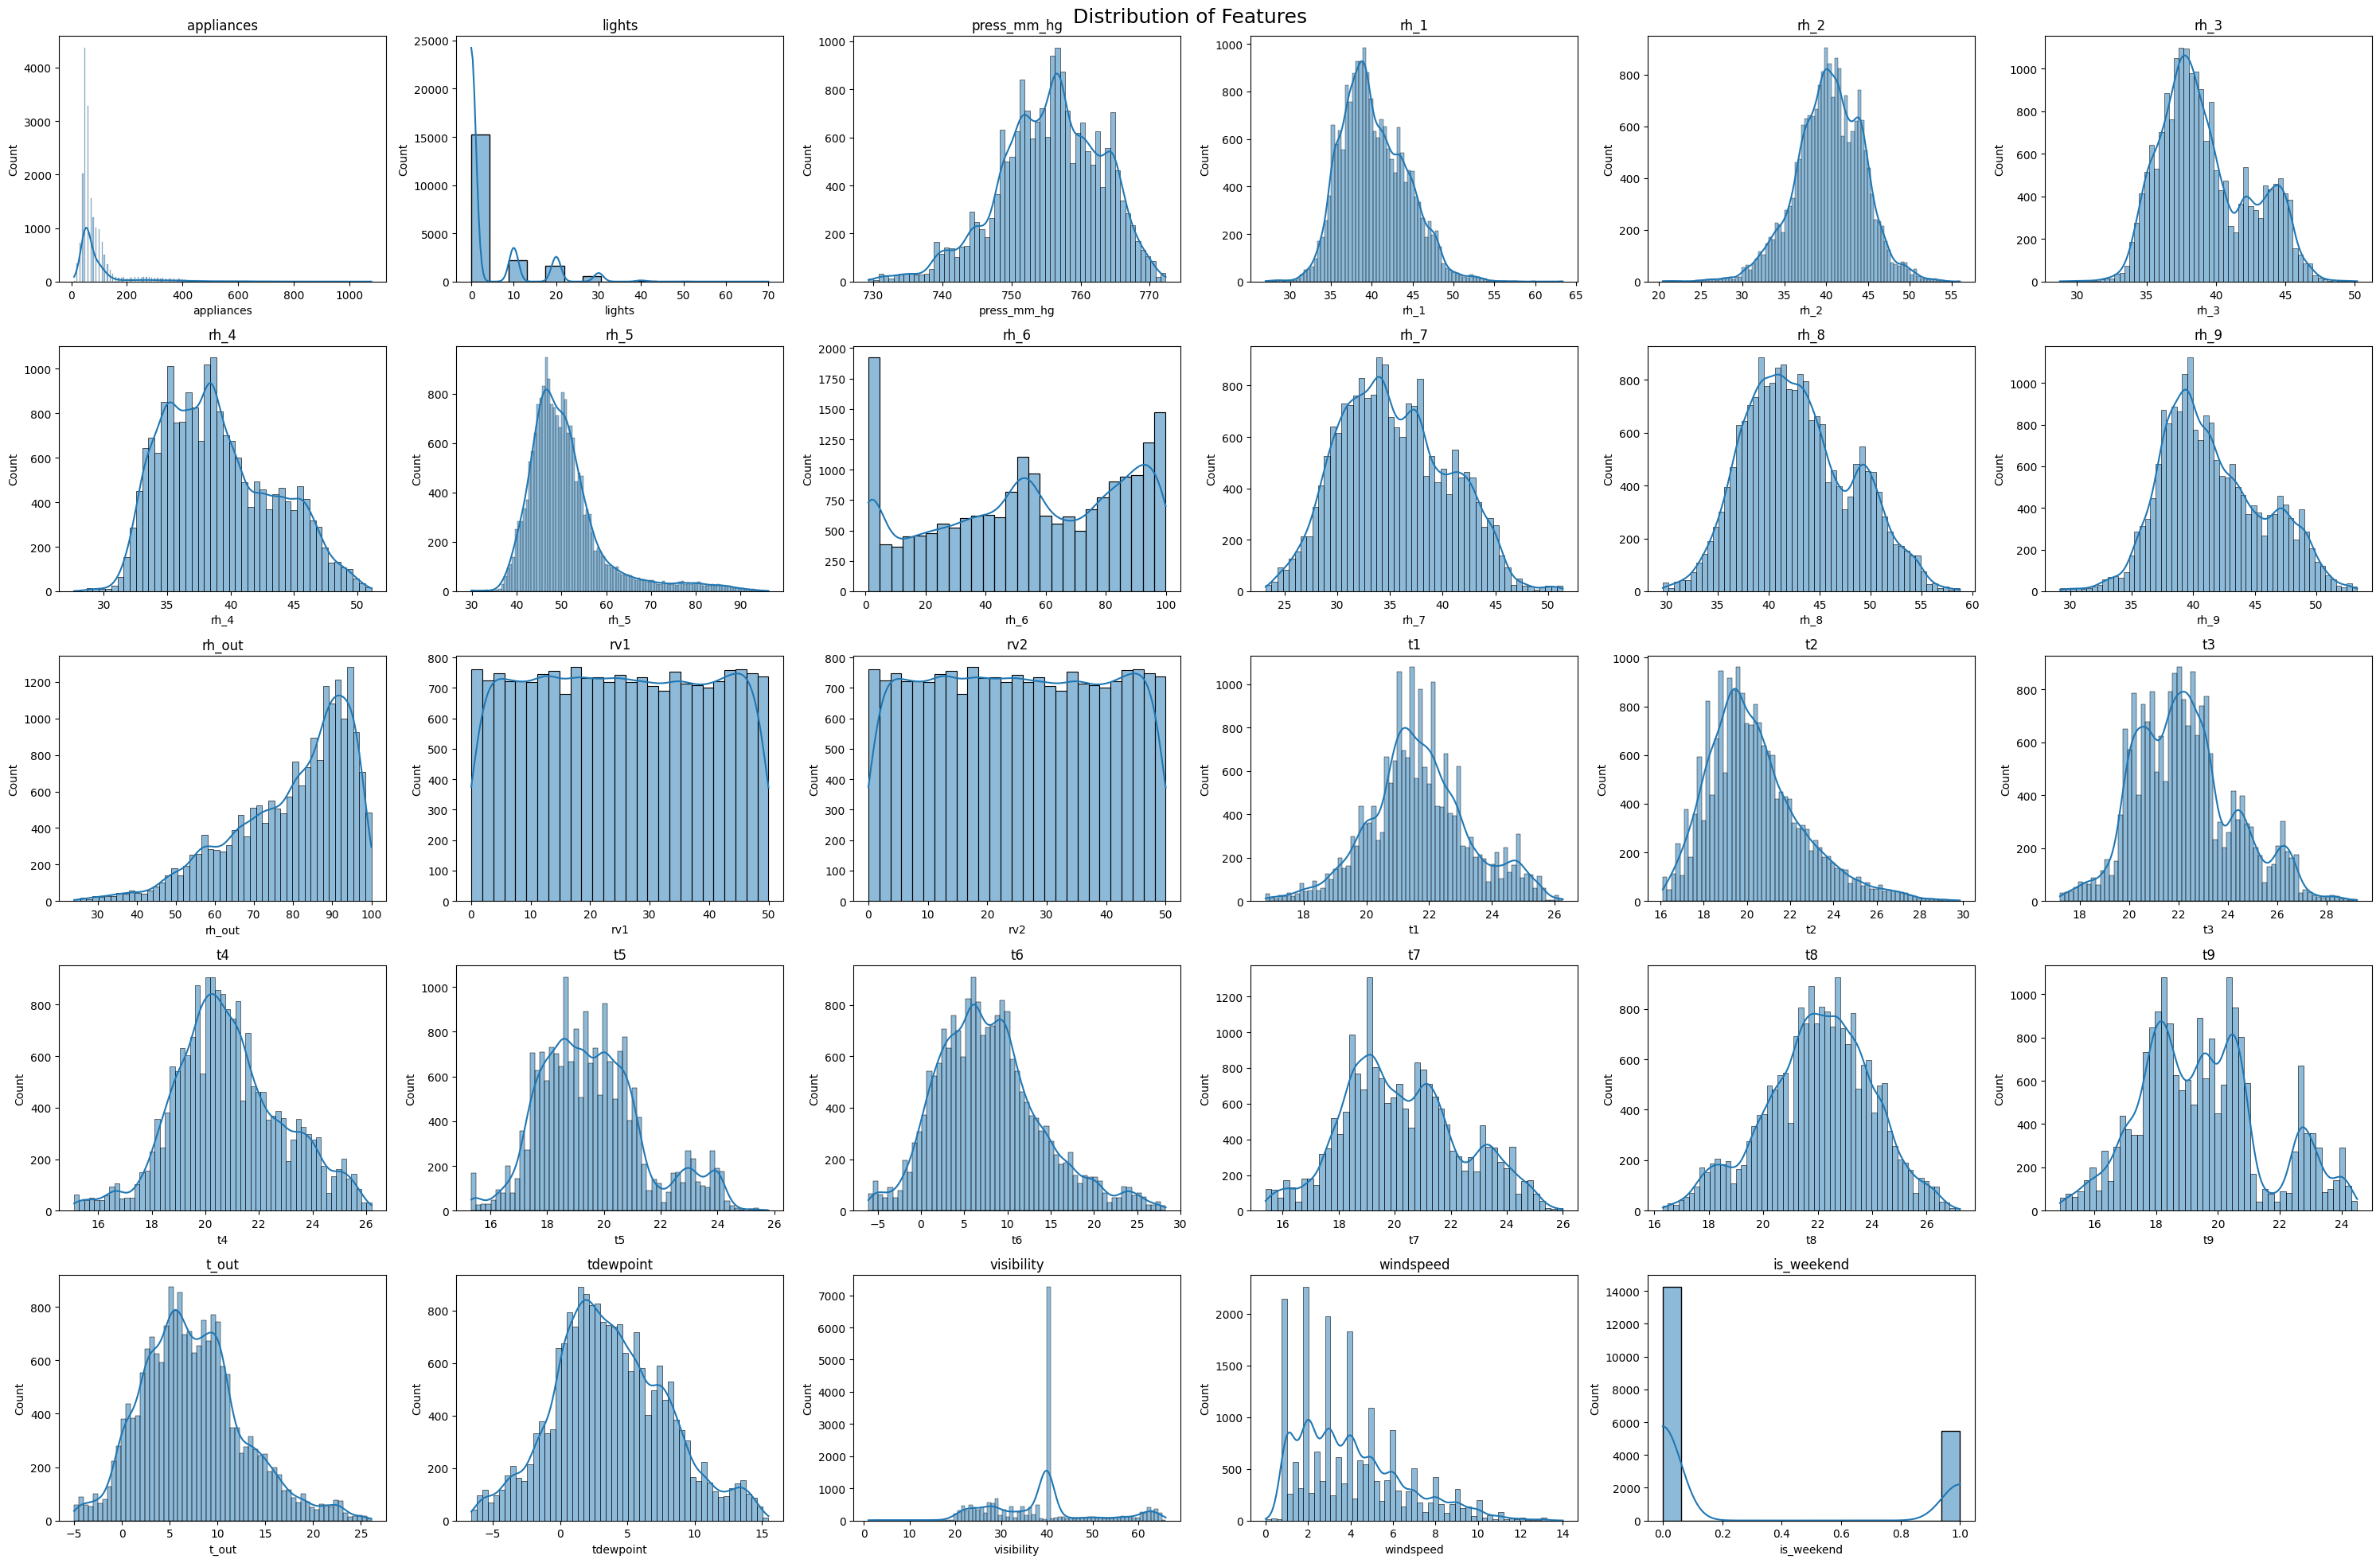

In [12]:
nrows= 5
ncols= np.ceil(len(df.columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 20))
axes= axes.flatten()

# plt.subplots_adjust(hspace=0.05, wspace= 0.0005)


for i, feature in enumerate(df.drop(columns= ["date"]).columns):
    sns.histplot(data= df, x= feature, kde=True, ax= axes[i])
    axes[i].set_title(feature) 

#removing subplots that weren't used
for i in range(len(df.drop(columns= ["date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])
    
fig.suptitle("Distribution of Features", fontsize=18)

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import probplot

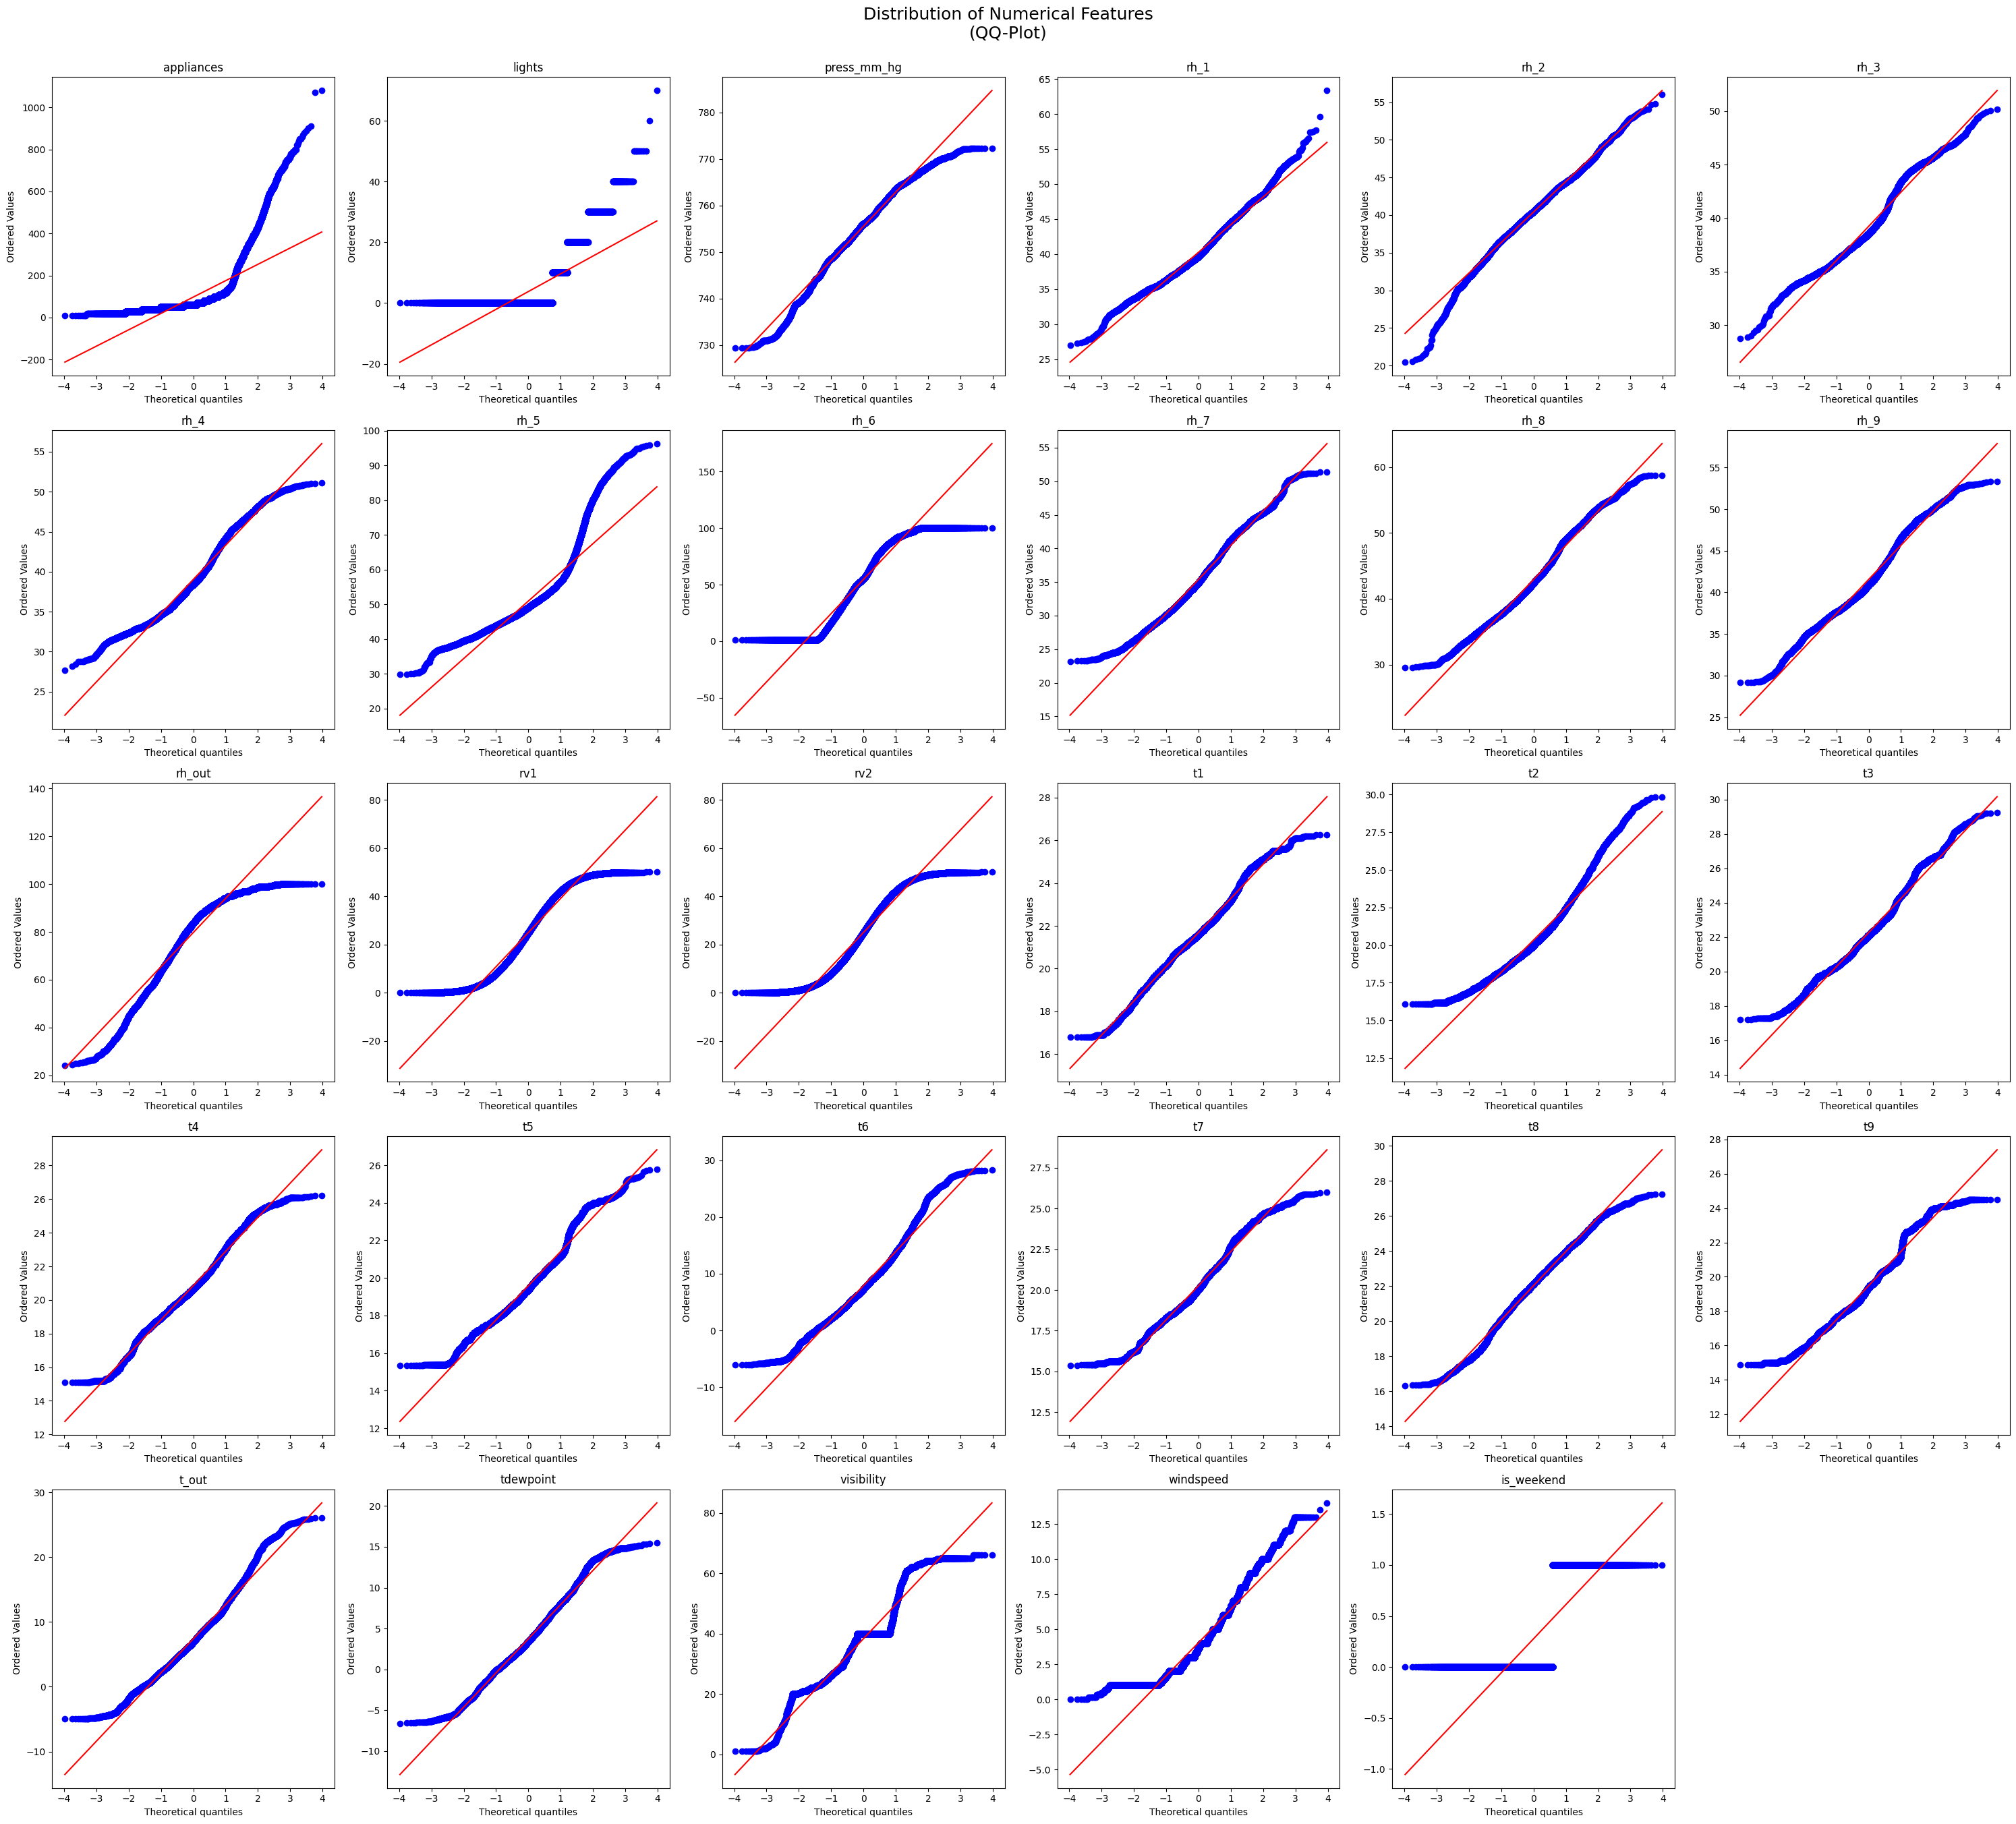

In [14]:
nrows= 5
ncols= np.ceil(len(df.columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 27))
axes= axes.flatten()

# plt.subplots_adjust(hspace=0.5)


for i, feature in enumerate(df.drop(columns= ["date"]).columns): 
    probplot(df[feature], dist="norm", plot=axes[i])
    axes[i].set_title(feature)

    
for i in range(len(df.drop(columns= ["date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])

suptitle= fig.suptitle("Distribution of Numerical Features\n(QQ-Plot)", fontsize=18)
# plt.subplots_adjust(hspace=0.5)
suptitle.set_y(1.0)

plt.tight_layout()
plt.show()

most columns seem to be normally distributed, except for windspeed, rv2, rv1, visibility, t2, rh_6, rh_5 and rh_out

In [15]:
len(df.loc[df["rv1"]==df["rv2"]])== len(df)

True

In [16]:
#rv1 and rv2 always have the same values, so we can remove one of them

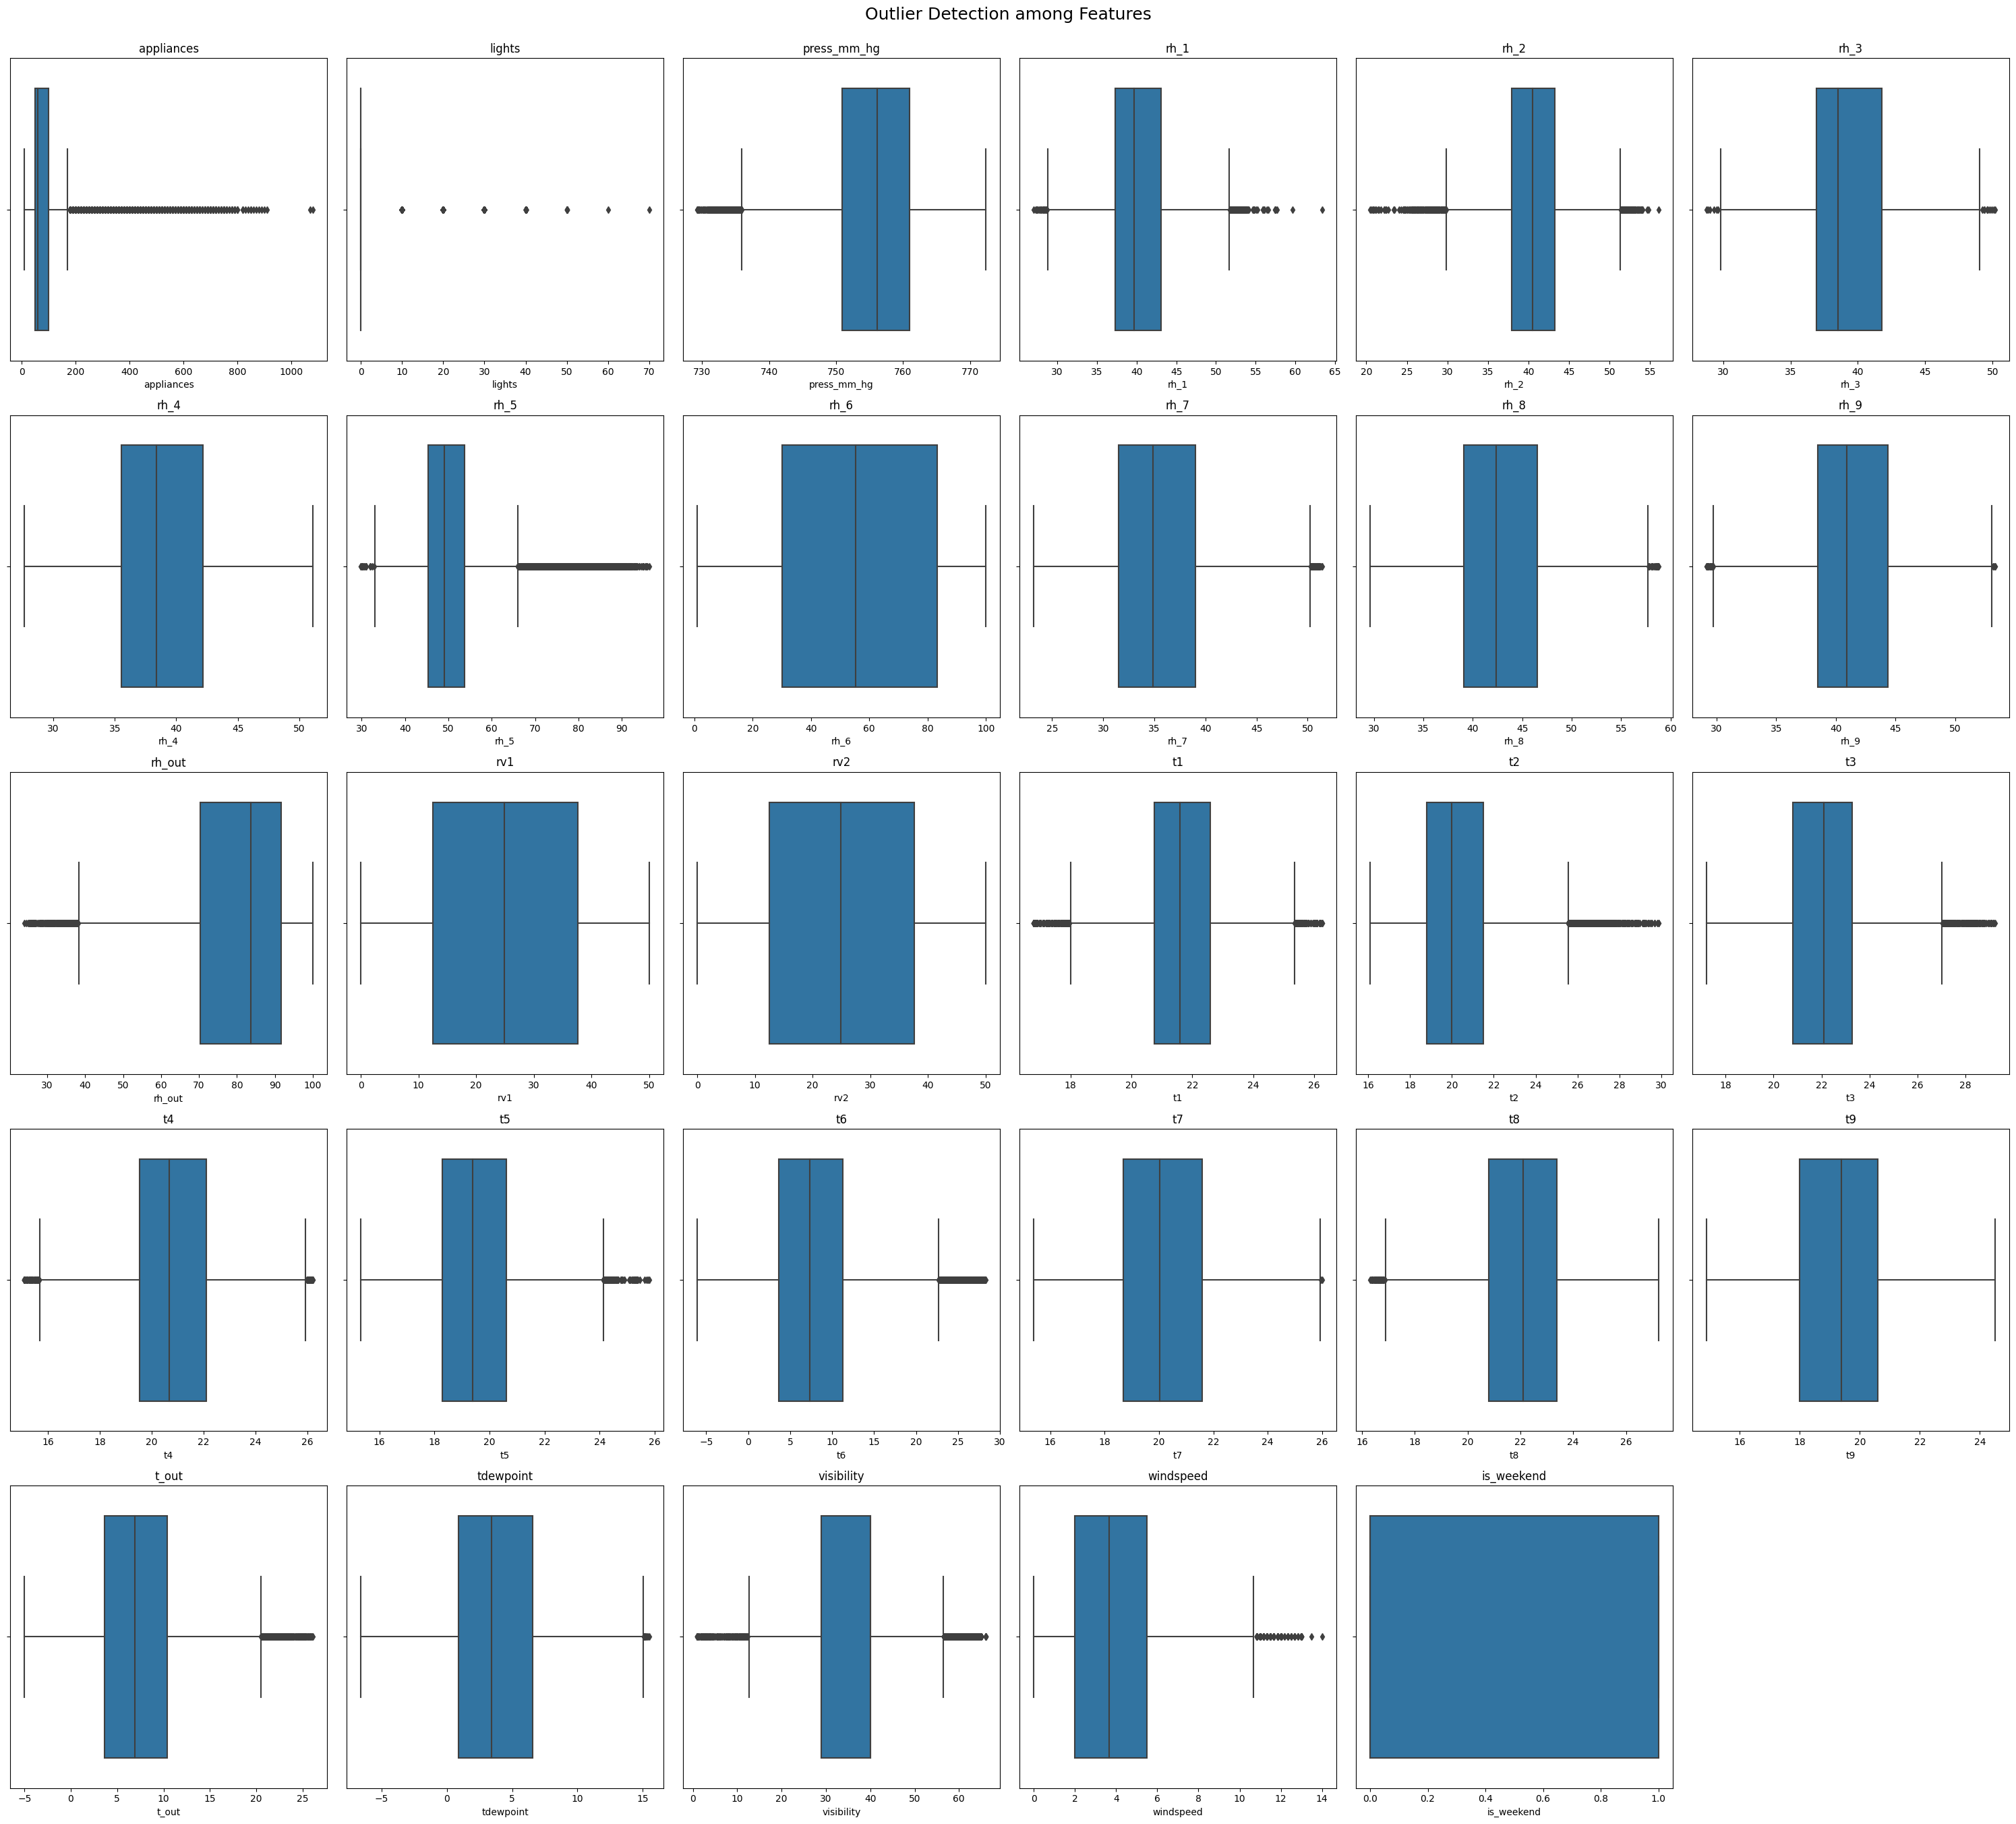

In [17]:
nrows= 5
ncols= np.ceil(len(df.columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 27))
axes= axes.flatten()

# plt.subplots_adjust(hspace=0.05, wspace= 0.0005)


for i, feature in enumerate(df.drop(columns= ["date"]).columns):
    sns.boxplot(data= df, x= feature, ax= axes[i])
    axes[i].set_title(feature)

    
for i in range(len(df.drop(columns= ["date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])

suptitle= fig.suptitle("Outlier Detection among Features", fontsize=18)
suptitle.set_y(1.0)

plt.tight_layout()
plt.show()

features- press_mm_hg, rh_1, rh_2, rh_3, rh_5, rh_7, rh_8, rh_9, rh_out, t1, t2, t3, t4, t5, t6, t7, t8, t_out, tdewpoint, visibility, windspeed all have outliers, which need to be treated before further model development.

In [18]:
df["lights"].value_counts()

lights
0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: count, dtype: int64

lights feature can be treated as a categorical variable, as the numbers of lights is always one of the 8 given values, also one value (0) significantly dominates the others.

    We can either map the 0 value as 0 and the rest as 1, or perform one hot encoding.
    The first option seems better as 0 is quite dominant with more than 15000 entries out of a total of 19,735.

In [19]:
df["lights"]= np.where(df["lights"]==0, 0, 1)

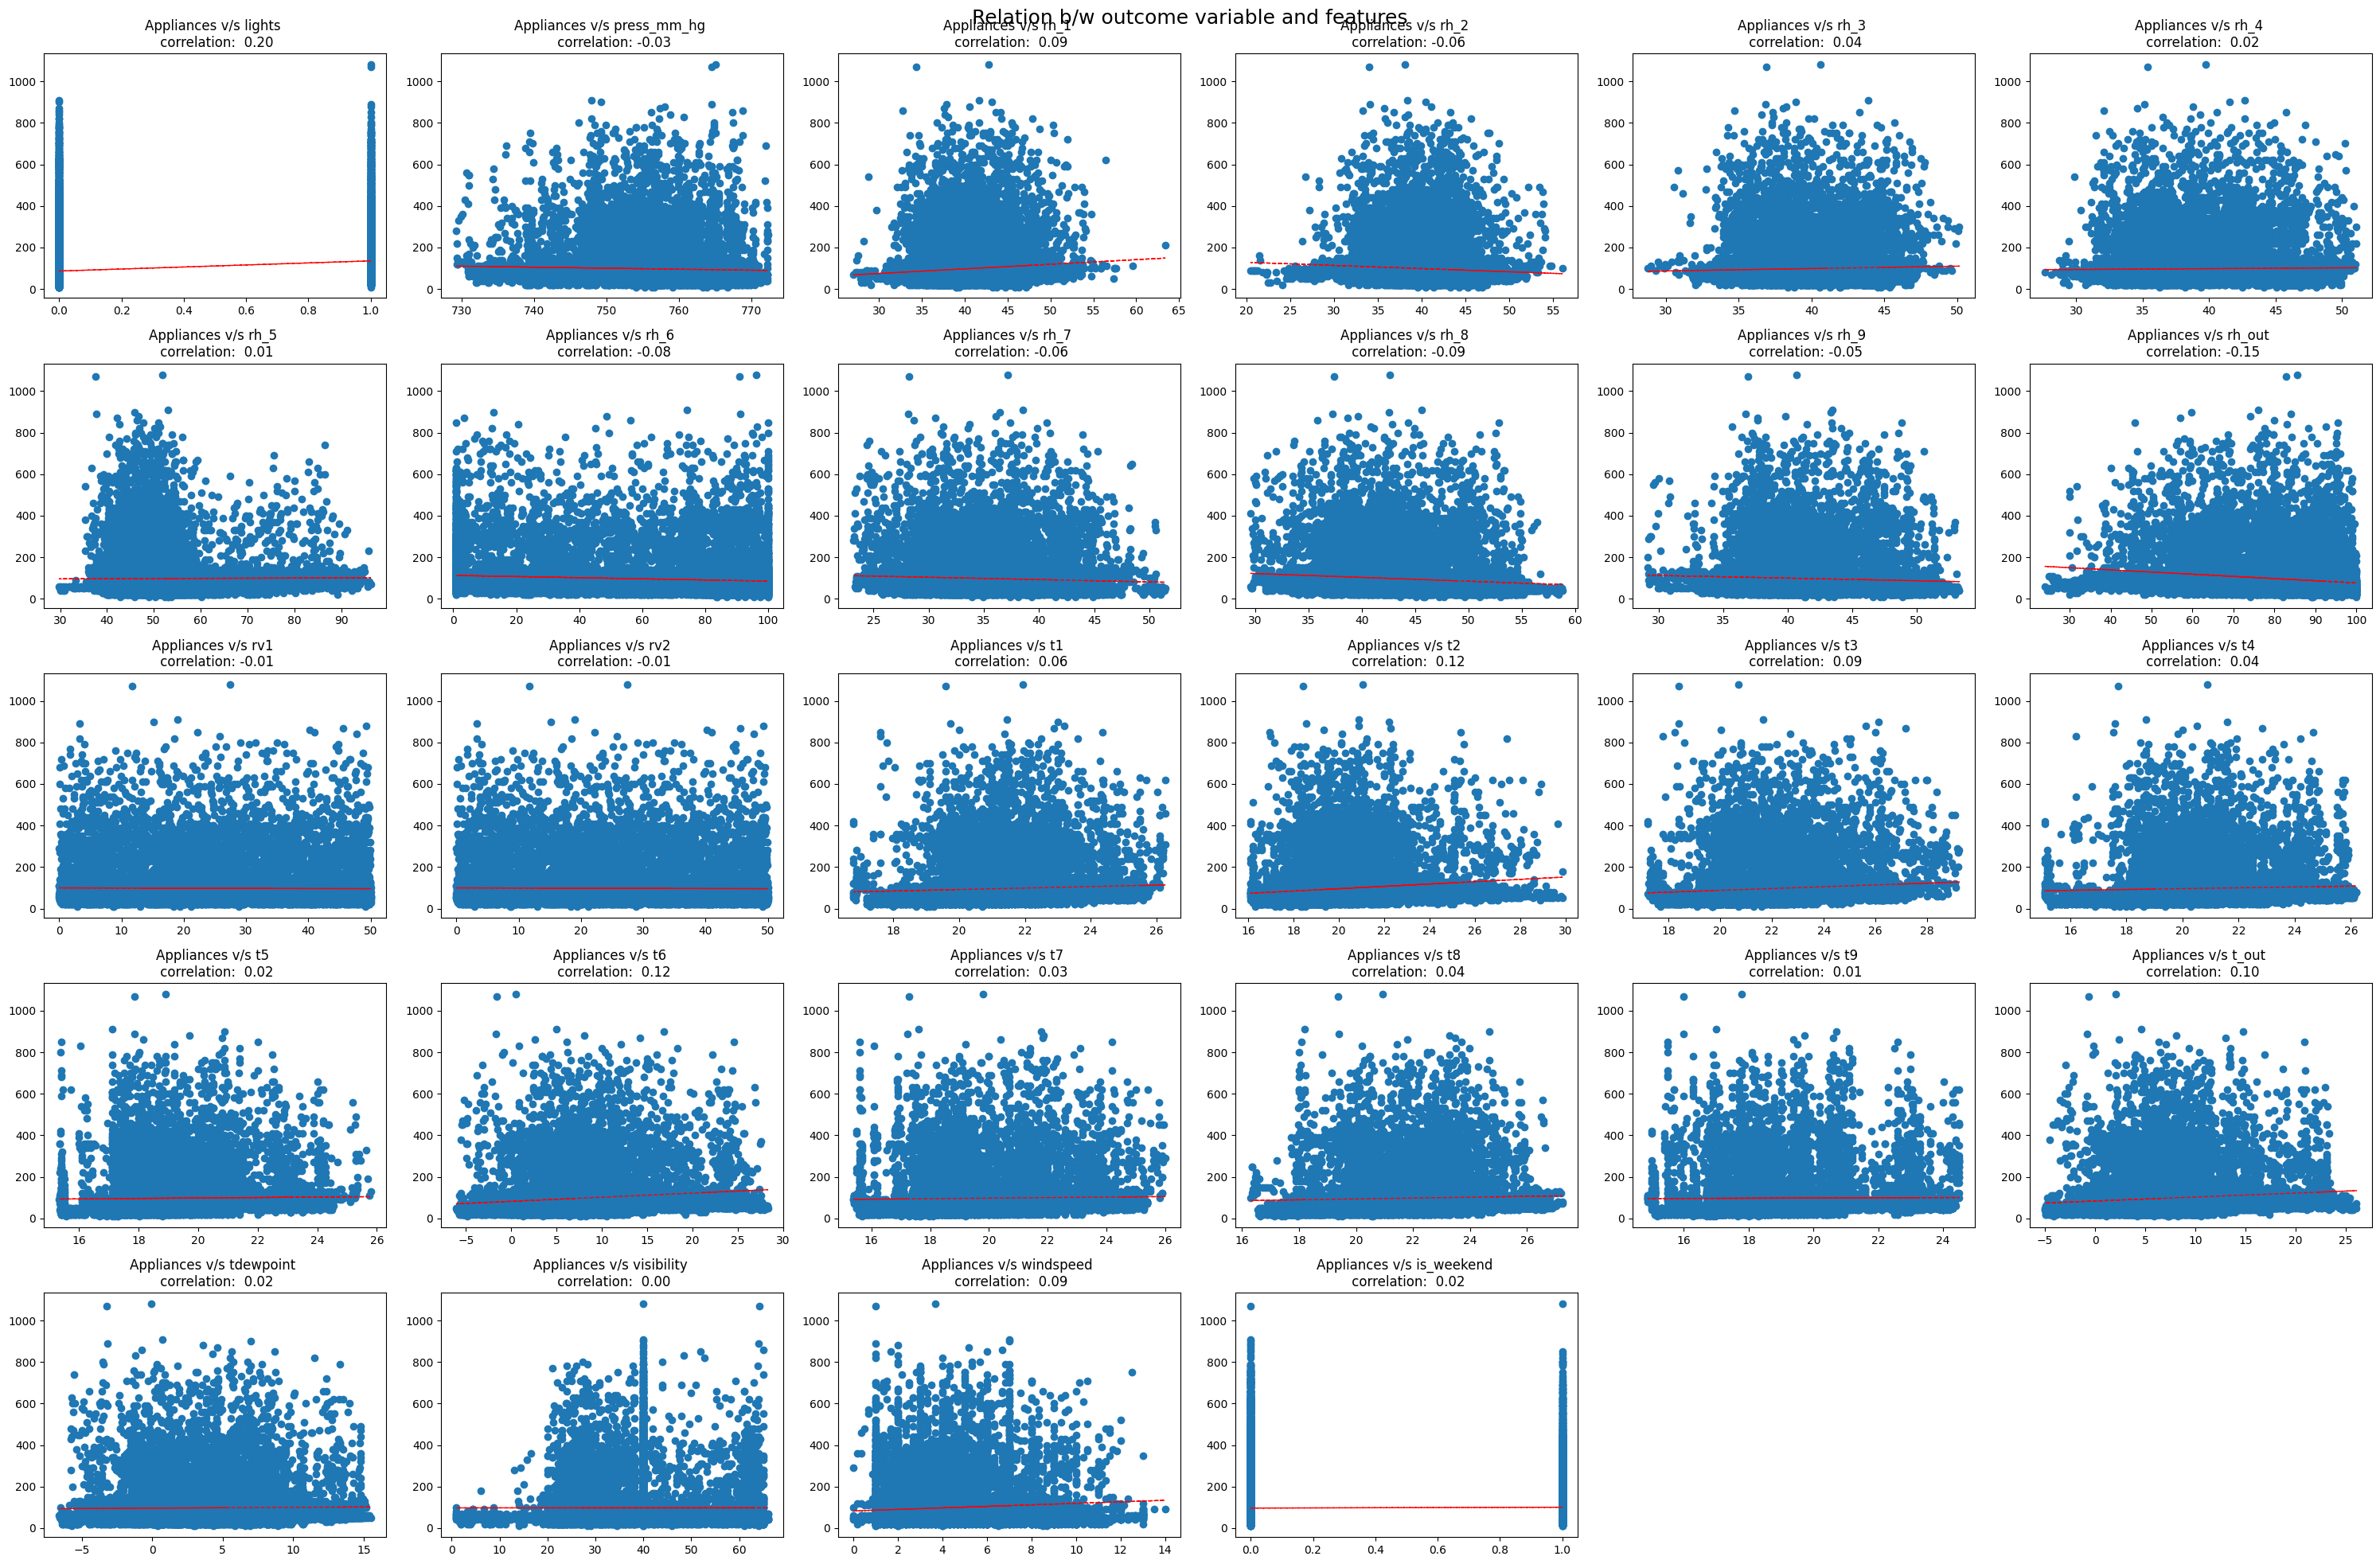

In [20]:
#bivariate analysis

nrows= 5
ncols= np.ceil(len(df.columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 20))
axes= axes.flatten()

# plt.subplots_adjust(hspace=0.5)


for i, col in enumerate(df.drop(columns= ["appliances", "date"]).columns):
    
    feature= df[col]
    outcome_var= df["appliances"]
    correlation= feature.corr(outcome_var)
    axes[i].scatter(feature, outcome_var)
    axes[i].set_title(f"Appliances v/s {col} \n correlation: {correlation: .2f}")
    
    #adding a least square line
    z= np.polyfit(feature, outcome_var, deg= 1)
    y_hat= np.poly1d(z)(feature)
    
    axes[i].plot(feature, y_hat, "r--", lw= 1)
    
for i in range(len(df.drop(columns= ["appliances", "date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])


fig.suptitle("Relation b/w outcome variable and features", fontsize=18)

plt.tight_layout()
plt.show()

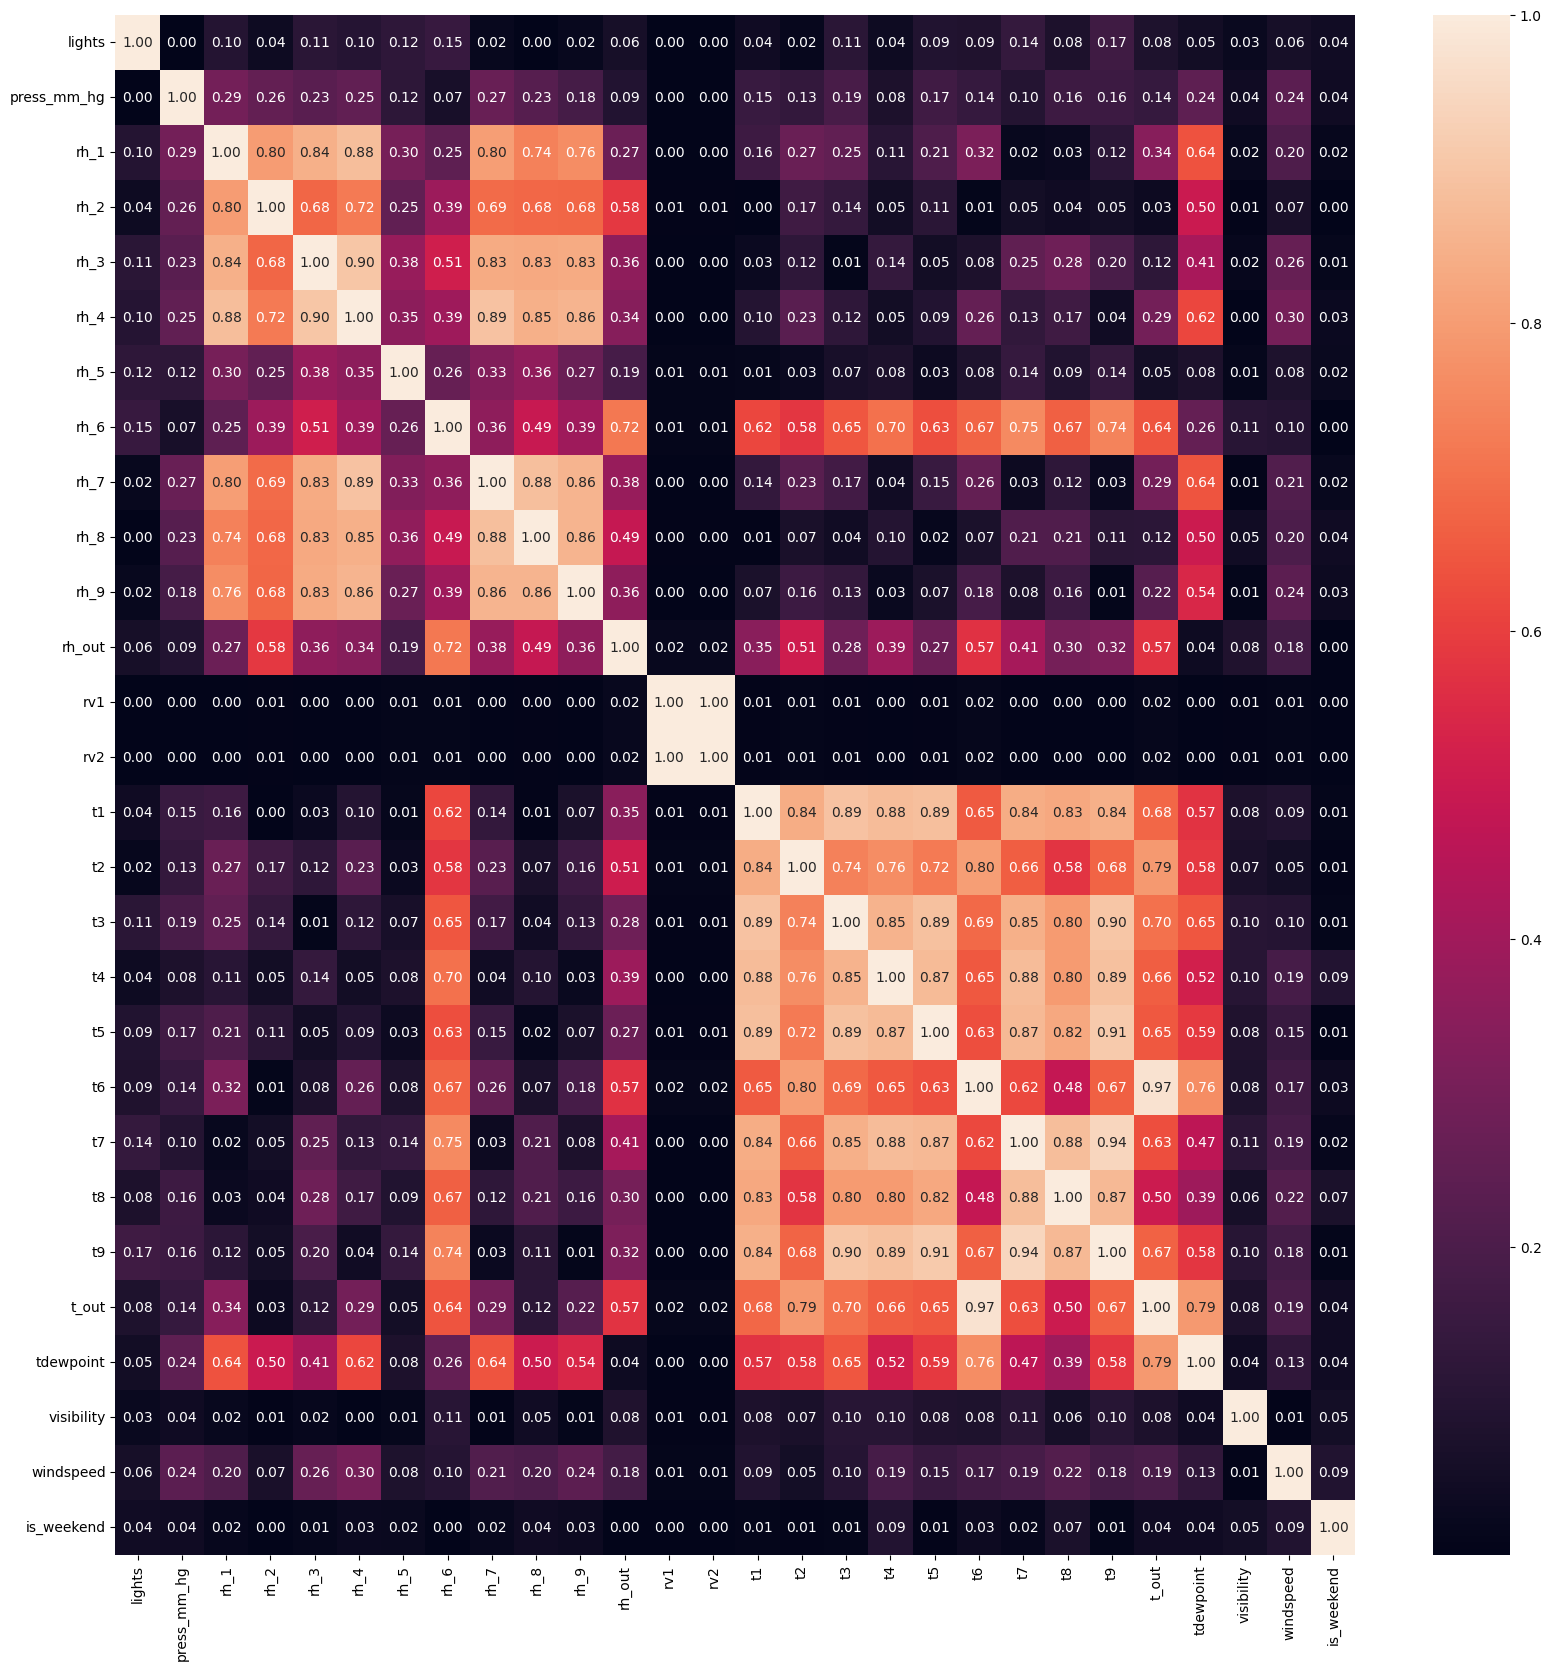

In [21]:
#multivariate analysis
#correlation chart

fig= plt.figure(figsize= (20, 20))
sns.heatmap(abs(df.drop(columns= ["appliances", "date"]).corr()), annot= True, fmt= ".2f")
plt.show()

In [22]:

#dealing with multicollinearity using VIF


from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif= pd.DataFrame()
    vif["variables"]= df.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i)  for i in range(df.shape[1])]
    
    return vif.sort_values(by='VIF',ascending=False).reset_index(drop=True)

In [23]:
calc_vif(df.drop(columns= ["appliances", "date"]))

variables          VIF
0           rv2          inf
1           rv1          inf
2            t1  3609.911100
3            t9  2604.830627
4            t2  2503.598869
5          rh_2  2175.056095
6   press_mm_hg  2085.308242
7          rh_1  1654.255066
8            t7  1620.137173
9          rh_3  1571.378435
10         rh_4  1385.238459
11       rh_out  1299.786977
12           t3  1241.171167
13           t5  1189.075563
14           t4  1030.211371
15           t8  1022.613860
16         rh_9   641.354511
17         rh_8   581.824251
18         rh_7   519.837828
19        t_out   400.518672
20    tdewpoint   132.609404
21           t6    89.022229
22         rh_5    45.139887
23         rh_6    40.403140
24   visibility    12.135004
25    windspeed     5.273707
26       lights     1.603751
27   is_weekend     1.571086

In [24]:
def vif_calculator_and_feature_dropper(df):
    df_copy= df.copy()
    while True:
        vif_df= calc_vif(df_copy)
        if vif_df.iloc[0,1]>10.0:
            df_copy= df_copy.drop(columns= [vif_df.iloc[0, 0]])
        else:
            break
    return vif_df

In [25]:
final_features= vif_calculator_and_feature_dropper(df.drop(columns= ["appliances", "date"]))
final_features

variables       VIF
0  visibility  6.130750
1        rh_6  4.110778
2   windspeed  3.582561
3         rv1  3.394352
4   tdewpoint  1.849419
5  is_weekend  1.376639
6      lights  1.325799

In [26]:
final_features_li= list(final_features.loc[:, "variables"])
final_features_li

['visibility', 'rh_6', 'windspeed', 'rv1', 'tdewpoint', 'is_weekend', 'lights']

# ****Model Building****

In [27]:
X= df_model.drop(columns= ["appliances"])
y= df_model["appliances"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [2]:
#importing ml models for regression

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor)
from xgboost import XGBRegressor

In [11]:
#finding the best ml model

models= {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNeigghborsRegressor": KNeighborsRegressor(),
    "SVR": SVR(kernel= "rbf"),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "XGBRegressor": XGBRegressor()
}

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import (
    OneHotEncoder, FunctionTransformer, StandardScaler, PowerTransformer)

from scipy import stats

from sklearn.decomposition import PCA
from sklearn.feature_selection import (
    RFE, RFECV)

from sklearn.metrics import (
    mean_squared_error, r2_score, PredictionErrorDisplay)

from sklearn.model_selection import (
    cross_val_score, KFold)


In [12]:
meta_data_00= []

for name, model in tqdm(models.items()):
    model_data= {}
    model_data["name"]= name
    model.random_state = 42
    kfold= KFold(n_splits= 5, shuffle= True, random_state= 42)
    scores= cross_val_score(
        model, X_train.drop(columns= ["date"]), y_train, 
        cv= kfold, scoring= "r2", error_score='raise'
    )
    model_data["average r2"]= np.mean(scores)
    meta_data_00.append(model_data)

100%|██████████| 9/9 [04:28<00:00, 29.78s/it]


In [18]:
model_rmse_df= pd.DataFrame(meta_data_00).sort_values("average rmse", ascending= False).reset_index(drop= True)
model_rmse_df

name  average rmse
0        ExtraTreesRegressor      0.483534
1      RandomForestRegressor      0.442390
2               XGBRegressor      0.413613
3  GradientBoostingRegressor      0.248195
4       KNeigghborsRegressor      0.172256
5           Ridge Regression      0.160785
6          Linear Regression      0.160784
7           Lasso Regression      0.158017
8                        SVR     -0.108428

In [35]:
print(f"since {model_rmse_df.iloc[0,0]}, {model_rmse_df.iloc[1,0]} and {model_rmse_df.iloc[2,0]} have given the best r2 scores, we'll perform hyperparameter tuning on the same and work forward.")

since ExtraTreesRegressor, RandomForestRegressor and XGBRegressor have given the best rmse scores, we'll perform hyperparameter tuning on the same and work forward.


In [14]:
def is_weekend(date_column):
    date_column= date_column.squeeze()

    date_column= pd.to_datetime(date_column)
    return pd.DataFrame(np.where(date_column.dt.weekday<5, 0, 1))

In [41]:
def is_lights(light_column):
    return pd.DataFrame(np.where(light_column==0, 0, 1))

In [1]:
def outlier_treatment(col):
    '''
    iqr based outlier treatment
    '''
    
    q1= np.percentile(col, 25, axis= 0)
    q3= np.percentile(col, 75, axis= 0)

    iqr= q3- q1
    
    lower_bound= q1- 1.5*iqr
    upper_bound=  q3+ 1.5*iqr
    
    return np.select(
        (col< lower_bound, col> upper_bound),
        (lower_bound, upper_bound),
        col
    )

In [16]:
#list of features with abnormality and outliers
li_abnormal= ["windspeed", "rv2", "rv1", "visibility", "t2", "rh_6", "rh_5", "rh_out"]
li_outlier= ["press_mm_hg", "rh_1", "rh_2", "rh_3", "rh_5", "rh_7", "rh_8", "rh_9", "rh_out", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t_out", "tdewpoint", "visibility", "windspeed"]

In [30]:
#col_index_abnormal
col_index_abnormal= [i for i, feature in enumerate(X_train.columns) if feature in li_abnormal and feature not in li_outlier]
col_index_abnormal

[8, 13, 14]

In [31]:
#col_index_outliers
col_index_outliers= [i for i, feature in enumerate(X_train.columns) if feature in li_outlier and feature not in li_abnormal]
col_index_outliers

[2, 3, 4, 5, 9, 10, 11, 15, 17, 18, 19, 20, 21, 22, 24, 25]

In [32]:
col_index_abnormal_outlier= [i for i, feature in enumerate(X_train.columns) if feature in li_abnormal and feature in li_outlier]
col_index_abnormal_outlier

[7, 12, 16, 26, 27]

In [8]:
feature_engineering= ColumnTransformer([
      (
          "transforming date into weekday/weekend"
          Pipeline([
            (  
                "date transformer",
                FunctionTransformer(is_weekend),
            ),
            (
                "One Hot Encoding",
                OneHotEncoder(
                    drop= "first"
                )
            )
        ]),
        [0]
    ),
    (
        "transforming lights column and OneHotEncoding",
        Pipeline([
           (
                "lights transformer",
                FunctionTransformer(is_lights)
            ),
            (
                "One Hot Encoder",
                OneHotEncoder(
                    drop= "first"
                )
            )
        ]),
        [1]
    ),
    (
        "outlier treatment and scaling",
        Pipeline([
            (
                "outlier treatment",
                FunctionTransformer(outlier_treatment)
            ),
            (
                "scaling",
                StandardScaler()
            )
        ]),
        col_index_outliers 
    ),
    (
        "skewness treatment and scaling",
        PowerTransformer(),
        col_index_abnormal
    ),
    (
        "outlier and skewness treatment for features with both problems",
        Pipeline([
            (
                "outlier treatment",
                FunctionTransformer(outlier_treatment)
            ),
            (
                "skewness treatment",
                PowerTransformer()
            )
        ]),
        col_index_abnormal_outlier
    )
],
    remainder= StandardScaler()
)

In [72]:
X_train_processed= feature_engineering.fit_transform(X_train)

In [1]:
model_param= {
    ExtraTreesRegressor(): {"n_estimators": [50, 100, 200, 500], "max_depth": [None, 10, 20, 50, 80, 100], 
                            "bootstrap": [True, False], "max_features": [None, "sqrt", "log2"], "warm_start": [True, False]},
    RandomForestRegressor(): {"n_estimators": [50, 100, 200, 500], "max_features": [None, "sqrt", "log2"],
                              "bootstrap": [True, False], "max_depth": [None, 10, 20, 50, 80, 100], "warm_start": [True, False]},
    XGBRegressor(): {"n_estimators": [50, 100, 200, 500], "learning_rate": [0.01, 0.1, 0.2],
                     "max_depth": [3, 4, 5], "gamma": [0, 1, 5], "reg_alpha": [0, 0.01, 0.1], 
                     "reg_lambda": [0, 0.01, 0.1],}
}

In [2]:
from skopt import BayesSearchCV

In [3]:
meta_data_01= []

for model, param_grid in tqdm(model_param.items()):

    model_info= {}
    model.random_state = 42
    
    bayes_cv= BayesSearchCV(
        model, param_grid, scoring= "r2",
        cv= 5, n_jobs= -1, error_score="raise"
    )
    bayes_cv.fit(X_train_processed, y_train)
    
    model_info["best estimator"]= bayes_cv.best_estimator_
    model_info["best r2"]= bayes_cv.best_score_
    
    meta_data_01.append(model_info)

  0%|          | 0/3 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evalu

In [4]:
best_estimator_meta_df= pd.DataFrame(meta_data_01).sort_values("best r2", ascending= False).reset_index(drop= True)
best_estimator_meta_df

best estimator  best rmse
0  (DecisionTreeRegressor(max_depth=50, max_featu...  71.288162
1  (ExtraTreeRegressor(max_depth=80, max_features...  71.479423
2  XGBRegressor(base_score=None, booster=None, ca...  77.168580

In [5]:
reg_rf= best_estimator_meta_df.iloc[0, 0]
reg_rf

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      random_state=42)

In [6]:
reg_et= best_estimator_meta_df.iloc[1, 0]
reg_et

ExtraTreesRegressor(max_depth=80, max_features='log2', n_estimators=200,
                    random_state=42)

In [7]:
reg_xg= best_estimator_meta_df.iloc[2, 0]
reg_xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

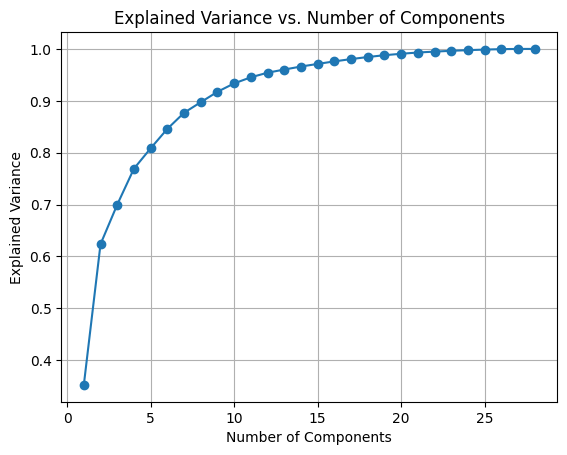

In [73]:
explained_variances = [] 

for n_components in range(1, X_train_processed.shape[1] + 1):

    pca = PCA(n_components=n_components)
    pca.fit(X_train_processed)
    explained_variances.append(pca.explained_variance_ratio_.sum())

# Plot the explained variance as a function of the number of components
plt.plot(n_components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [12]:
def model_analysis(y, y_hat):
    mse= mean_squared_error(y**2, y_hat**2)
    r2= r2_score(y**2, y_hat**2)
    return {"MSE": mse,
            "RMSE": np.sqrt(mse),
            "r2_score(test dataset)": r2}

### ML Model - 1

> #### Random Forest Regressor

In [8]:
rf_pipeline= Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "model",
        reg_rf
    )
])

scores= cross_val_score(
    rf_pipeline, X_train, y_train,
    cv= 5, scoring= "r2"
)

print(f"mean r2 score: {scores.mean()}")

mean r2 score: 0.5173427698457784


In [20]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                                                  PowerTransformer(),
                                                  [8, 13, 14]),
                                                 ('outlier and skewness '
                                                  'treatment for features with '
                                                  'both problems',
                                                  Pipeline(steps=[('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7cb561c22f80>)),
                                                                  ('skewness '
                                                                   'treatment',
                                                                   PowerTransformer())]),
                                                  [7, 12, 16, 26, 27])])),
                ('model',
                 RandomForestRegressor(bootstrap=False, max_depth=50,
                                       max_features='sqrt', random_state=42))])

In [21]:
y_pred= rf_pipeline.predict(X_test)

print(f"r2 score(train dataset): {rf_pipeline.score(X_train, y_train)}")
analysis= model_analysis(y_test, y_pred)

for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.9999999983232486
MSE: 1993065136.7508576
RMSE: 44643.75809394699
r2_score(test dataset): 0.41674943840088086


In [22]:
rf_pca_pipeline= Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "feature extraction",
        PCA(n_components= 23)
    ),
    (
        "model",
        reg_rf
    )
])

scores = cross_val_score(
    rf_pca_pipeline, X_train, y_train, 
    cv=5, scoring='r2'
)
mean_r2 = scores.mean()

print(f"mean r2 score: {mean_r2}")

mean r2 score: 0.3822858368258193


In [24]:
rf_pca_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                                                  'treatment for features with '
                                                  'both problems',
                                                  Pipeline(steps=[('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7cb561c22f80>)),
                                                                  ('skewness '
                                                                   'treatment',
                                                                   PowerTransformer())]),
                                                  [7, 12, 16, 26, 27])])),
                ('feature extraction', PCA(n_components=8)),
                ('model',
                 RandomForestRegressor(bootstrap=False, max_depth=50,
                                       max_features='sqrt', random_state=42))])

In [25]:
y_pred= rf_pca_pipeline.predict(X_test)

print(f"r2 score(train dataset): {rf_pca_pipeline.score(X_train, y_train)}")
analysis= model_analysis(y_test, y_pred)
for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.999656760700029
MSE: 2624172991.7383027
RMSE: 51226.68241979274
r2_score(test dataset): 0.23206204205661563


In [27]:
cv= KFold(n_splits= 5, shuffle= True, random_state= 42)

In [28]:
rfecv_rf = RFECV(
    estimator= reg_rf,
    step= 1,
    cv= cv,
    scoring= "r2",
    min_features_to_select= 5,
    n_jobs= -1,
#     verbose= 1
)
rfecv_rf.fit(X_processed, y_train)

n_features= rfecv_rf.n_features_
print(f"Optimal number of features: {n_features}")

Optimal number of features: 21


In [29]:
#RandomForest model with RFE for feature selection
rf_rfe_pipeline = Pipeline([
    (
        "Feature Engineering", 
         feature_engineering
    ),
    (
        "Feature Selection", 
         RFE(
             estimator=reg_rf,
             n_features_to_select= n_features
         )
    ),
    (
        "Model", 
         reg_rf
    )
])

scores = cross_val_score(
    rf_rfe_pipeline, X_train, y_train, 
    cv=5, scoring='r2'
)
mean_r2 = scores.mean()

print(f"mean r2 score: {mean_r2}")

mean r2 score: 0.5460642017877213


In [30]:
rf_rfe_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Feature Engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7cb561c22f80>)),
                                                                  ('skewness '
                                                                   'treatment',
                                                                   PowerTransformer())]),
                                                  [7, 12, 16, 26, 27])])),
                ('Feature Selection',
                 RFE(estimator=RandomForestRegressor(bootstrap=False,
                                                     max_depth=50,
                                                     max_features='sqrt',
                                                     random_state=42),
                     n_features_to_select=21)),
                ('Model',
                 RandomForestRegressor(bootstrap=False, max_depth=50,
                                       max_features='sqrt', random_state=42))])

In [31]:
y_pred = rf_rfe_pipeline.predict(X_test)

print(f"r2 score(train dataset): {rf_rfe_pipeline.score(X_train, y_train)}")
analysis= model_analysis(y_test, y_pred)
for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.9999999997749005
MSE: 1975901739.7591643
RMSE: 44451.116293735126
r2_score(test dataset): 0.42177213472412955


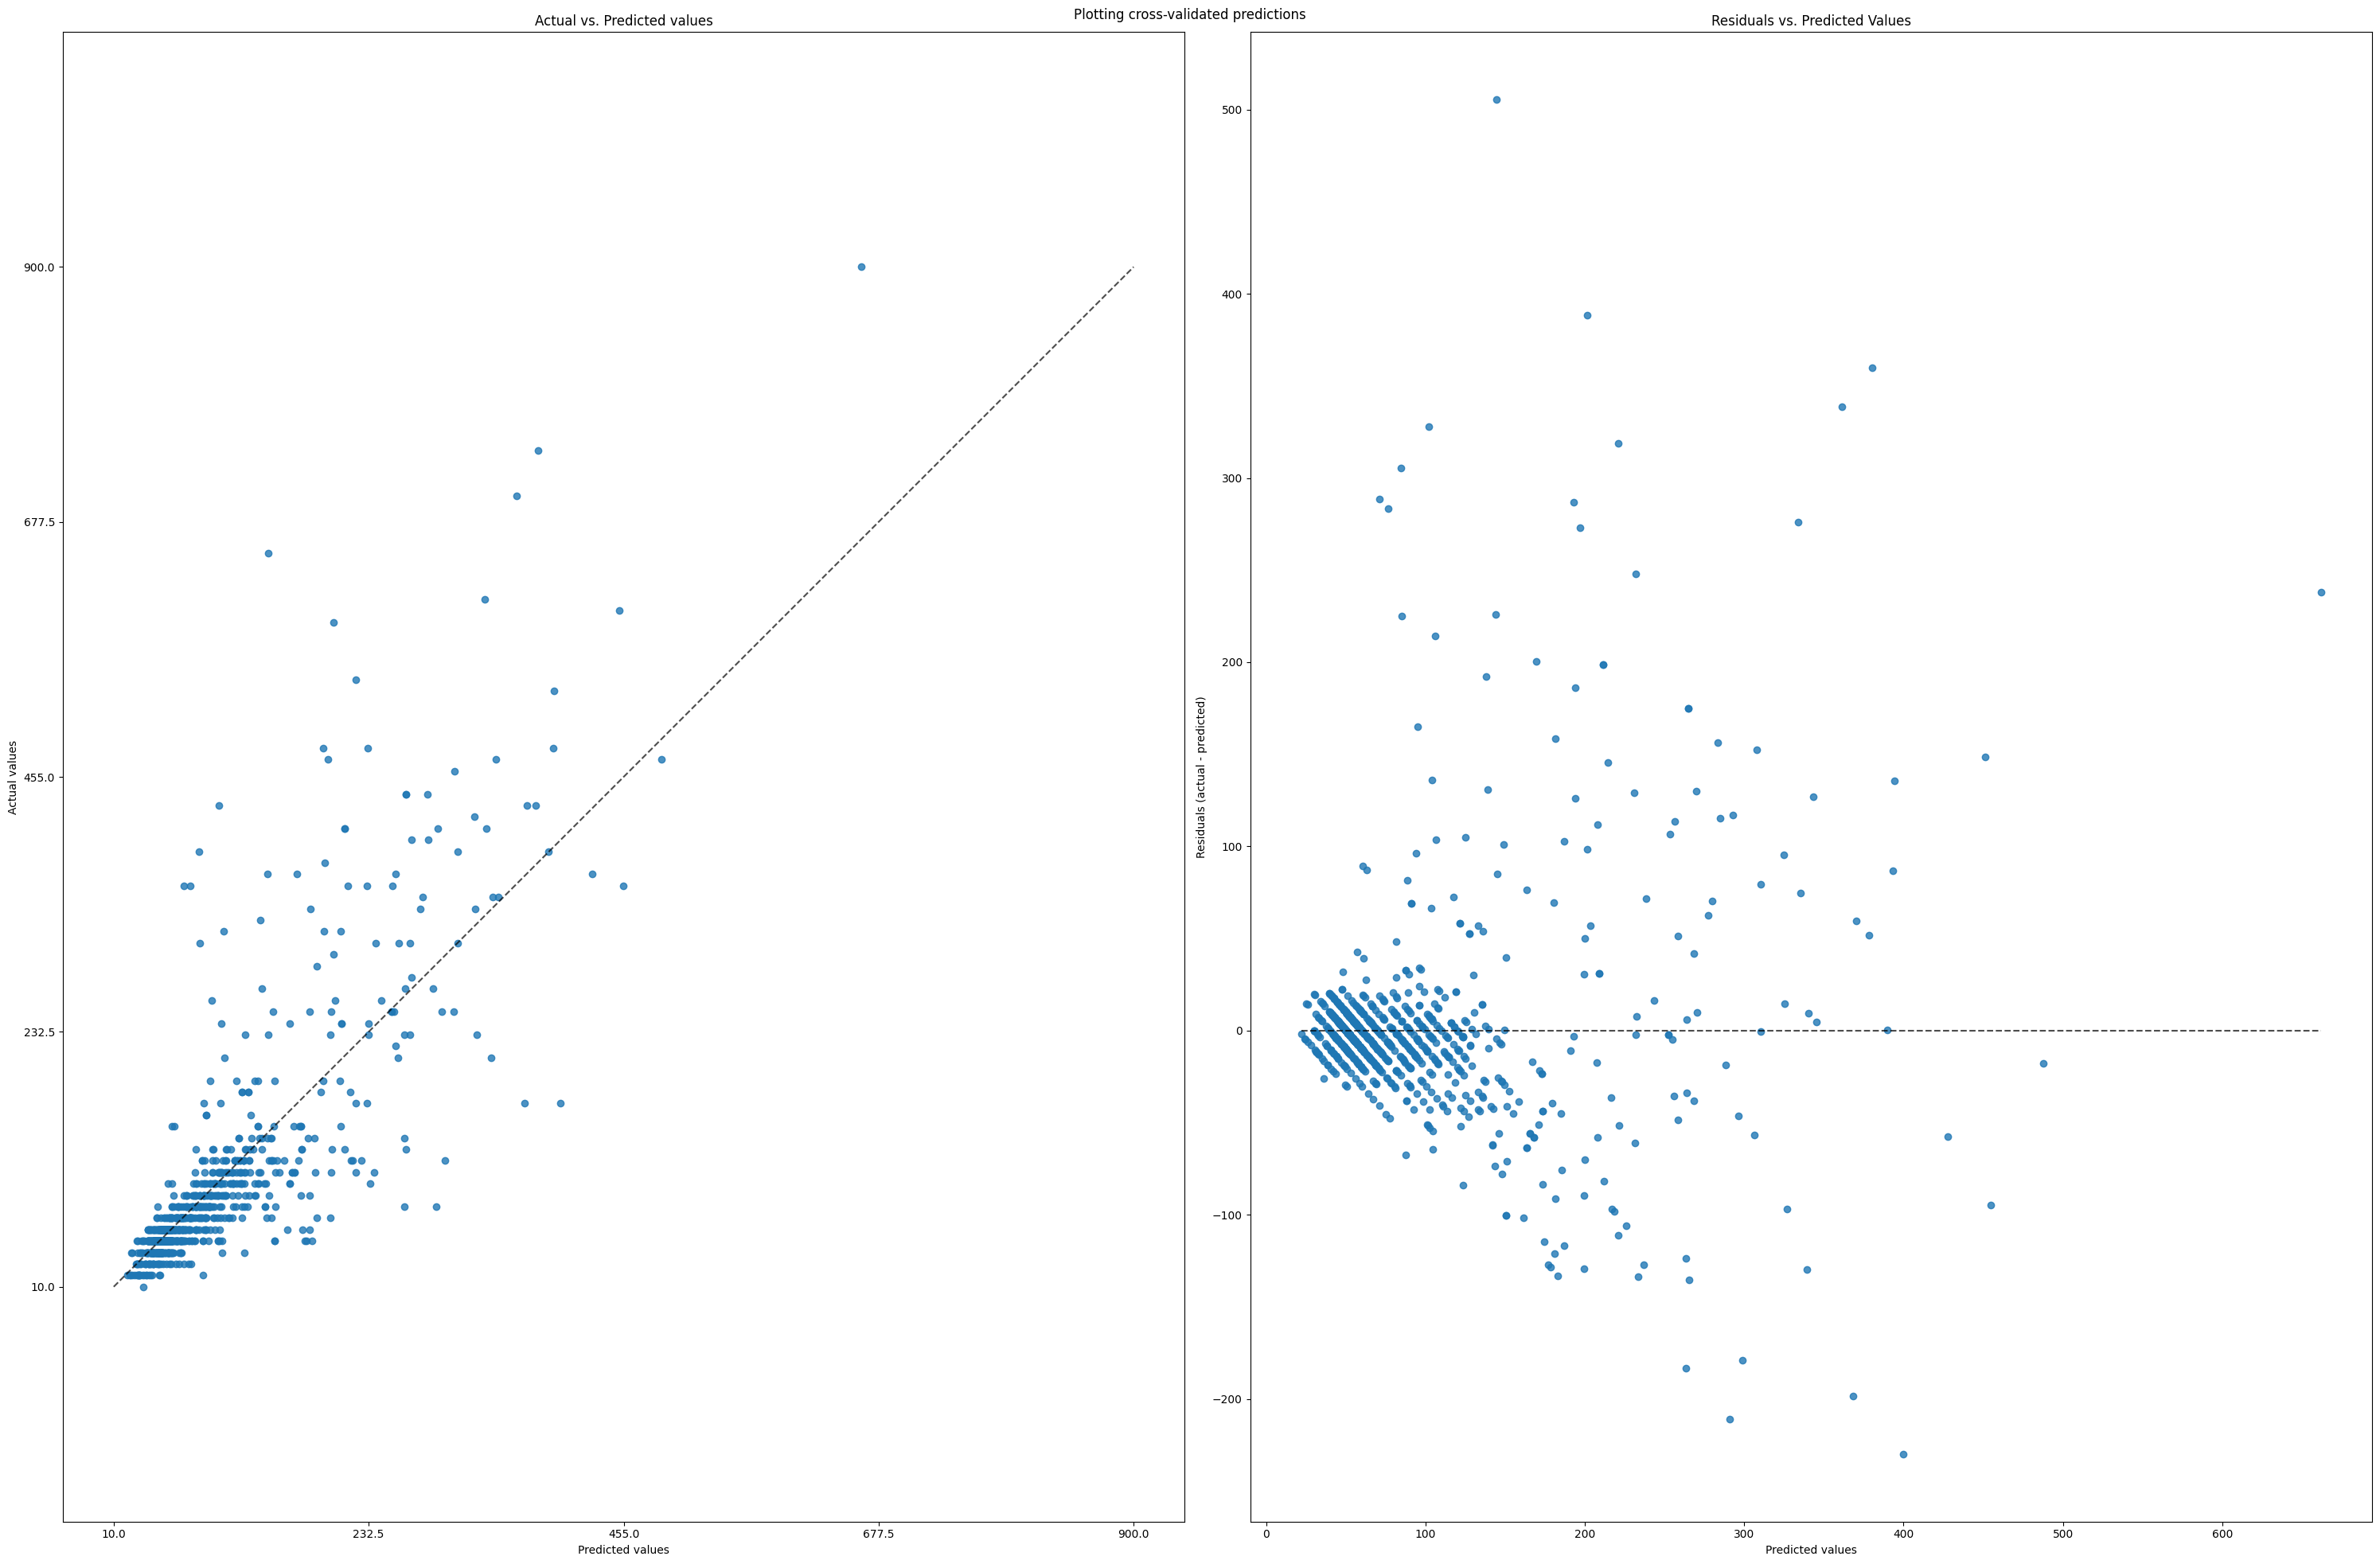

In [32]:
fig, axs = plt.subplots(ncols=2, figsize=(30, 20))


PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
#     subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")


PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
#     subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")

fig.suptitle("Plotting cross-validated predictions")

plt.tight_layout()
plt.show()

### ML Model - 2

> #### Extra Trees Regressor

In [33]:
et_pipeline= Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "model",
        reg_et
    )
])

scores= cross_val_score(
    et_pipeline, X_train, y_train,
    cv= 5, scoring= "r2"
)

print(f"mean r2 score: {scores.mean()}")

mean r2 score: 0.5163095135642464


In [34]:
et_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                                                  PowerTransformer(),
                                                  [8, 13, 14]),
                                                 ('outlier and skewness '
                                                  'treatment for features with '
                                                  'both problems',
                                                  Pipeline(steps=[('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7cb561c22f80>)),
                                                                  ('skewness '
                                                                   'treatment',
                                                                   PowerTransformer())]),
                                                  [7, 12, 16, 26, 27])])),
                ('model',
                 ExtraTreesRegressor(max_depth=80, max_features='log2',
                                     n_estimators=200, random_state=42))])

In [35]:
y_pred= et_pipeline.predict(X_test)
print(f"r2 score(train dataset): {et_pipeline.score(X_train, y_train)}")
analysis= model_analysis(y_test, y_pred)
for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.999999250577492
MSE: 1989719240.7313788
RMSE: 44606.26907432832
r2_score(test dataset): 0.41772858137841273


In [36]:
et_pca_pipeline= Pipeline([
    (
        "Feature Engineering",
        feature_engineering
    ),
    (
        "PCA",
        PCA(n_components= 8)
    ),
    (
        "Model",
        reg_et
    )
])
et_pca_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Feature Engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                                                 ('outlier and skewness '
                                                  'treatment for features with '
                                                  'both problems',
                                                  Pipeline(steps=[('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7cb561c22f80>)),
                                                                  ('skewness '
                                                                   'treatment',
                                                                   PowerTransformer())]),
                                                  [7, 12, 16, 26, 27])])),
                ('PCA', PCA(n_components=8)),
                ('Model',
                 ExtraTreesRegressor(max_depth=80, max_features='log2',
                                     n_estimators=200, random_state=42))])

In [37]:
y_pred= et_pca_pipeline.predict(X_test)

In [38]:
print(f"r2 score(train dataset): {et_pca_pipeline.score(X_train, y_train)}")
analysis= model_analysis(y_test, y_pred)
for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.9999931572791685
MSE: 2640924350.9035964
RMSE: 51389.9246049612
r2_score(test dataset): 0.22715992447874567


In [39]:
rfecv_et = RFECV(
    estimator= reg_et,
    step= 1,
    cv= cv,
    scoring= "r2",
    min_features_to_select= 5,
    n_jobs= -1,
#     verbose= 1
)
rfecv_et.fit(X_processed, y_train)

n_features= rfecv_et.n_features_
print(f"Optimal number of features: {n_features}")

Optimal number of features: 19


In [40]:
et_rfe_pipeline= Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "feature selection",
        RFE(estimator= reg_et,
           n_features_to_select= n_features)
    ),
    (
        "model",
        reg_et
    )
])


scores = cross_val_score(
    et_rfe_pipeline, X_train, y_train, 
    cv=5, scoring='r2'
)
mean_r2 = scores.mean()

print(f"mean r2 score: {mean_r2}")

mean r2 score: 0.5538646331283883


In [41]:
et_rfe_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7cb561c22f80>)),
                                                                  ('skewness '
                                                                   'treatment',
                                                                   PowerTransformer())]),
                                                  [7, 12, 16, 26, 27])])),
                ('feature selection',
                 RFE(estimator=ExtraTreesRegressor(max_depth=80,
                                                   max_features='log2',
                                                   n_estimators=200,
                                                   random_state=42),
                     n_features_to_select=19)),
                ('model',
                 ExtraTreesRegressor(max_depth=80, max_features='log2',
                                     n_estimators=200, random_state=42))])

In [42]:
print(f"r2 score(train dataset): {et_rfe_pipeline.score(X_train, y_train)}")
y_pred= et_rfe_pipeline.predict(X_test)
analysis= model_analysis(y_test, y_pred)
for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.9999995511989994
MSE: 1832711736.5251076
RMSE: 42810.18262662643
r2_score(test dataset): 0.4636752558322498


### ML Model - 3

> #### Xtra Gradient Boost Regressor

In [43]:
xg_pipeline= Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "model",
        reg_xg
    )
])

scores= cross_val_score(
    xg_pipeline,X_train, y_train,
    cv= 5, scoring= "r2"
)
print(f"mean r2 score: {scores.mean()}")

mean r2 score: 0.4426860661669627


In [44]:
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                              feature_types=None, gamma=1, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [45]:
y_pred= xg_pipeline.predict(X_test)
print(f"r2 score(train dataset): {xg_pipeline.score(X_train, y_train)}")
analysis= model_analysis(y_test, y_pred)
for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.8876205630465692
MSE: 2407165408.5758247
RMSE: 49062.871996814705
r2_score(test dataset): 0.29556713901351683


In [46]:
rfecv_xg= RFECV(
    reg_xg,
    cv= cv,
    scoring= "neg_mean_squared_error",
    min_features_to_select= 5,
    n_jobs= -1,
    verbose= 1
)

rfecv_xg.fit(X_processed, y_train)

n_features= rfecv_xg.n_features_
print(f"Optimal number of features: {n_features}")


Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Optimal number of features: 24


In [47]:
xg_rfe_pipeline= Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "feature selection",
        RFE(
            reg_xg,
            n_features_to_select= n_features
        )
    ),
    (
        "model",
        reg_xg
    )
])

scores= cross_val_score(
    xg_rfe_pipeline, X_train, y_train,
    cv= 5, scoring= "r2"
)

print(f"mean r2 score: {scores.mean()}")

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 featur

In [48]:
xg_rfe_pipeline.fit(X_train, y_train)

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 featur

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('date transformer',
                                                  FunctionTransformer(func=<function is_weekend at 0x7cb57310dd80>),
                                                  [0]),
                                                 ('transforming lights column '
                                                  'and OneHotEncoding',
                                                  Pipeline(steps=[('lights '
                                                                   'transformer',
                                                                   FunctionTransformer(func=<function is_lights at 0x7cb561c217e0>)),
                                                                  ('One Hot '
                                                                   'Encoder...
                              feature_types=None, gamma=1, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [49]:
print(f"r2 score(train dataset): {xg_rfe_pipeline.score(X_train, y_train)}")
y_pred= xg_rfe_pipeline.predict(X_test)
analysis= model_analysis(y_test, y_pred)

for metric, score in analysis.items():
    print(f"{metric}: {score}")

r2 score(train dataset): 0.8846888127168331
MSE: 2406327911.0501914
RMSE: 49054.33631240149
r2_score(test dataset): 0.29581222428100584


In [59]:
import shap

In [74]:
explainer = shap.Explainer(et_rfe_pipeline.named_steps["model"], X_train_processed)

In [77]:
X_test_processed= feature_engineering.transform(X_test)

In [94]:
shap_values = explainer.shap_values(X_test_processed)

100%|===================| 6508/6513 [26:00<00:01]        

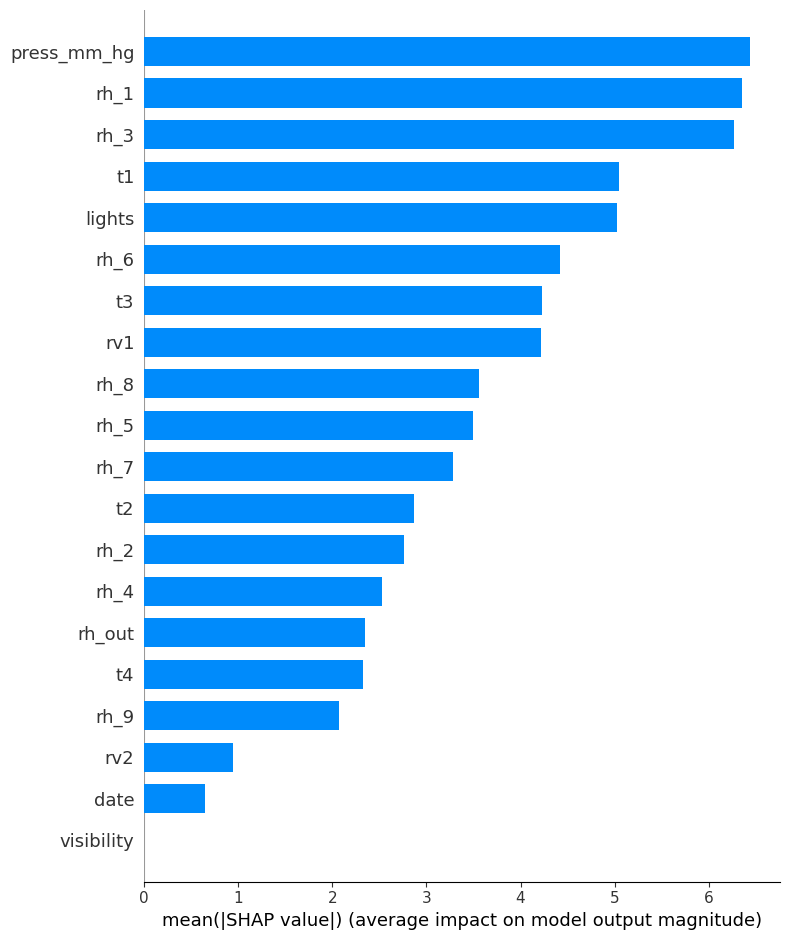

In [99]:
shap.initjs()
shap.summary_plot(shap_values, X_test_processed, plot_type= "bar", feature_names= list(X_train.columns))

In [6]:
exp= shap.KernelExplainer(et_rfe_pipeline, X_train)

Provided model function fails when applied to the provided data set.


TypeError: 'Pipeline' object is not callable

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***